<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/randomforest/05_importancia_predictores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [9]:
sns.set(style="darkgrid")

#**Data**
---

In [2]:
url="https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(url)

In [4]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# **Importancia por pureza de nodos**
---


In [6]:
X = data.drop('medv', axis = 1)
y = data['medv']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size = 0.75,
    random_state = 12354,
    shuffle = True
)

In [18]:
model = RandomForestRegressor(
    n_estimators=100,
    max_features = 11,
    criterion='squared_error',
    max_depth= None,
    oob_score= True,
    n_jobs= -1,
    random_state=12354
)

In [19]:
model.fit(X, y)

RandomForestRegressor(max_features=11, n_jobs=-1, oob_score=True,
                      random_state=12354)

In [21]:
importance_features = pd.DataFrame(
                            {'predictor': data.drop(columns = "medv").columns,
                             'importancia': model.feature_importances_}
                            )

In [23]:
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importance_features.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
5,rm,0.406609
12,lstat,0.375554
7,dis,0.063467
0,crim,0.041676
4,nox,0.030230
10,ptratio,0.020781
9,tax,0.015219
6,age,0.014936
2,indus,0.012583
11,b,0.012548


# **Importancia por permutacion**
---

In [31]:
importance = permutation_importance(
    estimator = model,
    X = X_train,
    y = y_train,
    n_repeats = 5,
    scoring   = 'neg_root_mean_squared_error',
    random_state=12354
)

In [34]:
df_importancia = pd.DataFrame(
                    {
                        k: importance[k] for k in [
                            'importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train.columns
df_importancia.sort_values('importances_mean', ascending=False)

,importances_mean,importances_std,feature
12,6.047975,0.250169,lstat
5,5.320027,0.124942,rm
7,1.934540,0.063643,dis
4,1.015733,0.063048,nox
0,1.002689,0.040884,crim
10,0.704333,0.054410,ptratio
9,0.423916,0.029956,tax
6,0.407095,0.019329,age
11,0.341073,0.045105,b
2,0.209303,0.030787,indus


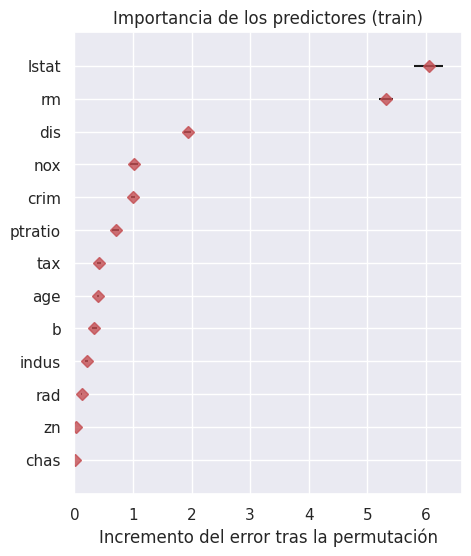

In [35]:
# Gráfico
fig, ax = plt.subplots(figsize=(5, 6))
df_importancia = df_importancia.sort_values('importances_mean', ascending=True)
ax.barh(
    df_importancia['feature'],
    df_importancia['importances_mean'],
    xerr=df_importancia['importances_std'],
    align='center',
    alpha=0
)
ax.plot(
    df_importancia['importances_mean'],
    df_importancia['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Importancia de los predictores (train)')
ax.set_xlabel('Incremento del error tras la permutación');

Ambas estrategias identifican LSTAT y RM como los predictores más influyentes, acorde a los datos de entrenamiento.